In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import csv
from gaze_tracking import GazeTracking

# Gaze tracking

In [11]:
filename='Eyes.csv'
header=['X','Y']
gaze = GazeTracking()
webcam = cv2.VideoCapture(0)


with open(filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(header)
    while webcam.isOpened():
        # We get a new frame from the webcam
        _, frame = webcam.read()

        # We send this frame to GazeTracking to analyze it
        gaze.refresh(frame)

        frame = gaze.annotated_frame()
        text = ""
        if gaze.is_blinking():
            text = "Blinking"
        elif gaze.is_right():
            text = "Looking right"
        elif gaze.is_left():
            text = "Looking left"
        elif gaze.is_center():
            text = "Looking center"

        cv2.putText(frame, text, (90, 60), cv2.FONT_HERSHEY_DUPLEX, 1.6, (147, 58, 31), 2)

        left_pupil = gaze.pupil_left_coords()
        right_pupil = gaze.pupil_right_coords()
        if left_pupil != None and right_pupil != None:
            csv_writer.writerow([left_pupil[0], right_pupil[0]])
            cv2.putText(frame, "Left pupil:  " + str(left_pupil), (90, 130), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)
            cv2.putText(frame, "Right pupil: " + str(right_pupil), (90, 165), cv2.FONT_HERSHEY_DUPLEX, 0.9, (147, 58, 31), 1)

        cv2.imshow("Demo", frame)

        if cv2.waitKey(1) == 27:
            break
    
    webcam.release()
    cv2.destroyAllWindows()


# Heatmap visualization

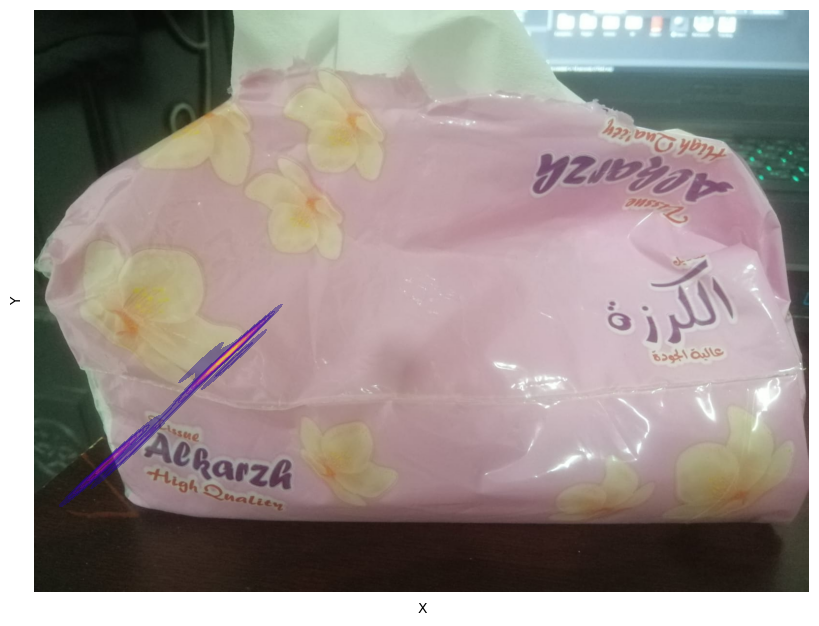

In [12]:
csv='./Eyes.csv'
image='../Manadeel.jpg'
eye_data=pd.read_csv(csv)
img=cv2.imread(image)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

fig,ax=plt.subplots(figsize=(10,8))

ax.imshow(img,extent=[0,img.shape[1],0,img.shape[0]],origin='upper')

sns.kdeplot(x=eye_data['X'],y=eye_data['Y'],fill=True,cmap='plasma',cbar=False,ax=ax, alpha=0.4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.savefig('Heatmapped image.png',bbox_inches='tight',pad_inches=0)
plt.show()